In [173]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as stats

In [174]:
df = pd.read_csv('../data/chain-dataset-All-borrowed=true&doublecounted=true&liquidstaking=true&pool2=true&staking=true&vesting=true.csv')

### Data Visualization

In [175]:
df

,Protocol,29/06/2018,30/06/2018,01/07/2018,02/07/2018,03/07/2018,04/07/2018,05/07/2018,06/07/2018,07/07/2018,...,04/07/2023,05/07/2023,06/07/2023,07/07/2023,08/07/2023,09/07/2023,10/07/2023,11/07/2023,12/07/2023,13/07/2023
0,Total,20541.94079,20614.458266,20597.007379,20522.013923,20549.859431,20568.292127,20626.645285,20617.72841,20734.876737,...,9.049958e+10,8.993403e+10,8.866260e+10,8.680927e+10,8.787212e+10,8.800786e+10,8.770205e+10,8.839741e+10,8.873297e+10,8.899470e+10
1,Hats.V1,20541.94079,20614.458266,20597.007379,20522.013923,20549.859431,20568.292127,20626.645285,20617.72841,20734.876737,...,9.117814e+05,9.106530e+05,9.088854e+05,8.940330e+05,8.995401e+05,9.029862e+05,9.016146e+05,9.077809e+05,8.972552e+05,8.938042e+05
2,Uniswap V1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.008957e+06,8.055955e+06,7.958546e+06,7.838586e+06,7.876040e+06,7.913779e+06,7.915621e+06,7.905320e+06,7.905050e+06,7.873354e+06
3,MakerDAO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.202437e+09,6.160819e+09,6.080139e+09,5.662609e+09,5.662968e+09,5.647239e+09,5.626240e+09,5.598385e+09,5.571779e+09,5.511257e+09
4,Compound,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.947739e+09,1.931476e+09,1.906482e+09,1.865340e+09,1.887977e+09,1.899805e+09,1.897622e+09,1.892089e+09,1.911158e+09,1.928661e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2814,Coinscope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.555492e+04,1.573648e+04,1.539532e+04
2815,zk-Swap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.074741e+04,1.078375e+04,2.289123e+04
2816,Sigmao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.579950e+00,2.622949e+00,2.541294e+00
2817,Tenx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.136380e+05,1.111465e+05,1.074206e+05


### Business / Data Understanding

- The goal analyze various trends in the defi protocols in the current "bear" market.
- Understand where the large capital is flowing to build the foundation for the next bull market.
- The data presents different protocol data from different chain ecosystems (Ethereum, Binance Smart Chain, Polygon, etc.) and different categories (DEX, Lending, Derivatives, etc.)

### Data Preparation
- The data is not presented in a very functional and understandable way.
  - The timeframe should be adapted. The data behind the 12-10-2022 (symbolizes BTC lowest price in the last bear market) will be removed.

In [176]:
from datetime import date

date_limit = date(2022, 10, 12)
for col in df.columns:
    strcol = str(col).split('/')
    if (strcol and len(strcol) == 3 and int(strcol[0]) <= 31 and int(strcol[1]) <= 12 and int(strcol[2]) <= 2022):
        comparing_date = date(int(strcol[2]), int(strcol[1]), int(strcol[0]))
        if comparing_date < date_limit:
            df = df.drop(columns=[col])


In [177]:
df.describe()

,12/10/2022,13/10/2022,14/10/2022,15/10/2022,16/10/2022,17/10/2022,18/10/2022,19/10/2022,20/10/2022,21/10/2022,...,04/07/2023,05/07/2023,06/07/2023,07/07/2023,08/07/2023,09/07/2023,10/07/2023,11/07/2023,12/07/2023,13/07/2023
count,1.926000e+03,1.930000e+03,1.929000e+03,1.926000e+03,1.930000e+03,1.937000e+03,1.938000e+03,1.942000e+03,1.950000e+03,1.956000e+03,...,2.668000e+03,2.667000e+03,2.670000e+03,2.674000e+03,2.673000e+03,2.675000e+03,2.676000e+03,2.681000e+03,2.679000e+03,2.681000e+03
mean,9.319344e+07,9.248070e+07,9.148510e+07,9.138066e+07,9.086020e+07,9.139839e+07,9.206378e+07,9.125450e+07,8.986169e+07,8.877022e+07,...,6.784076e+07,6.744209e+07,6.641393e+07,6.492840e+07,6.574794e+07,6.580027e+07,6.554713e+07,6.594361e+07,6.624335e+07,6.638918e+07
std,2.078254e+09,2.064870e+09,2.042246e+09,2.038519e+09,2.029135e+09,2.044849e+09,2.060402e+09,2.044275e+09,2.016922e+09,1.995677e+09,...,1.792926e+09,1.782037e+09,1.755756e+09,1.717208e+09,1.738684e+09,1.740504e+09,1.734279e+09,1.746343e+09,1.753553e+09,1.758097e+09
min,5.276507e-13,5.282227e-13,5.272940e-13,5.274238e-13,5.274079e-13,5.272375e-13,5.282227e-13,5.276174e-13,5.313889e-13,5.276950e-13,...,-9.507651e+04,-9.987734e+04,-1.124472e+05,-1.545990e+05,-1.581056e+05,-1.557940e+05,-1.625198e+05,-1.714847e+05,-1.748256e+05,-1.773745e+05
25%,3.329415e+04,3.334106e+04,3.332395e+04,3.330489e+04,3.327204e+04,3.274204e+04,3.412415e+04,3.459112e+04,3.442603e+04,3.424802e+04,...,1.632613e+04,1.606355e+04,1.515325e+04,1.534384e+04,1.491384e+04,1.480995e+04,1.449179e+04,1.471593e+04,1.458471e+04,1.475351e+04
50%,5.069903e+05,4.978379e+05,5.138007e+05,5.065537e+05,5.112529e+05,5.085543e+05,5.078025e+05,5.030822e+05,5.133655e+05,4.927170e+05,...,2.856259e+05,2.783296e+05,2.827356e+05,2.749797e+05,2.681768e+05,2.691762e+05,2.687178e+05,2.703429e+05,2.628316e+05,2.625093e+05
75%,5.381797e+06,5.429584e+06,5.267229e+06,5.274152e+06,5.334412e+06,5.209188e+06,5.337508e+06,5.169665e+06,5.341021e+06,5.253118e+06,...,2.968559e+06,2.979251e+06,2.926949e+06,2.881120e+06,2.865708e+06,2.837795e+06,2.823755e+06,2.816916e+06,2.824451e+06,2.810146e+06
max,8.974529e+10,8.924387e+10,8.823738e+10,8.799957e+10,8.768009e+10,8.851934e+10,8.920980e+10,8.860812e+10,8.761515e+10,8.681728e+10,...,9.049958e+10,8.993403e+10,8.866260e+10,8.680927e+10,8.787212e+10,8.800786e+10,8.770205e+10,8.839741e+10,8.873297e+10,8.899470e+10


In [178]:
df

,Protocol,12/10/2022,13/10/2022,14/10/2022,15/10/2022,16/10/2022,17/10/2022,18/10/2022,19/10/2022,20/10/2022,...,04/07/2023,05/07/2023,06/07/2023,07/07/2023,08/07/2023,09/07/2023,10/07/2023,11/07/2023,12/07/2023,13/07/2023
0,Total,8.974529e+10,8.924387e+10,8.823738e+10,8.799957e+10,8.768009e+10,8.851934e+10,8.920980e+10,8.860812e+10,8.761515e+10,...,9.049958e+10,8.993403e+10,8.866260e+10,8.680927e+10,8.787212e+10,8.800786e+10,8.770205e+10,8.839741e+10,8.873297e+10,8.899470e+10
1,Hats.V1,5.492062e+05,5.435522e+05,5.417310e+05,5.414887e+05,5.335476e+05,1.033751e+06,1.048899e+06,1.045165e+06,1.028441e+06,...,9.117814e+05,9.106530e+05,9.088854e+05,8.940330e+05,8.995401e+05,9.029862e+05,9.016146e+05,9.077809e+05,8.972552e+05,8.938042e+05
2,Uniswap V1,7.872534e+06,7.796642e+06,7.826632e+06,7.960921e+06,7.924875e+06,8.000611e+06,8.042587e+06,7.973020e+06,8.003480e+06,...,8.008957e+06,8.055955e+06,7.958546e+06,7.838586e+06,7.876040e+06,7.913779e+06,7.915621e+06,7.905320e+06,7.905050e+06,7.873354e+06
3,MakerDAO,7.507678e+09,7.606528e+09,7.760095e+09,7.743949e+09,7.699616e+09,7.757268e+09,7.838912e+09,7.784292e+09,7.724255e+09,...,6.202437e+09,6.160819e+09,6.080139e+09,5.662609e+09,5.662968e+09,5.647239e+09,5.626240e+09,5.598385e+09,5.571779e+09,5.511257e+09
4,Compound,3.103006e+09,3.035375e+09,3.036512e+09,3.039554e+09,3.028782e+09,3.033125e+09,3.060369e+09,3.040912e+09,3.044011e+09,...,1.947739e+09,1.931476e+09,1.906482e+09,1.865340e+09,1.887977e+09,1.899805e+09,1.897622e+09,1.892089e+09,1.911158e+09,1.928661e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2814,Coinscope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.555492e+04,1.573648e+04,1.539532e+04
2815,zk-Swap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.074741e+04,1.078375e+04,2.289123e+04
2816,Sigmao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.579950e+00,2.622949e+00,2.541294e+00
2817,Tenx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.136380e+05,1.111465e+05,1.074206e+05


### Data Cleaning

In [179]:
# drop row if percentage of NaN values is greater than 90%
for row in df.loc[df.isna().mean(axis=1) > 0.9].index:
    df = df.drop(row)

df

,Protocol,12/10/2022,13/10/2022,14/10/2022,15/10/2022,16/10/2022,17/10/2022,18/10/2022,19/10/2022,20/10/2022,...,04/07/2023,05/07/2023,06/07/2023,07/07/2023,08/07/2023,09/07/2023,10/07/2023,11/07/2023,12/07/2023,13/07/2023
0,Total,8.974529e+10,8.924387e+10,8.823738e+10,8.799957e+10,8.768009e+10,8.851934e+10,8.920980e+10,8.860812e+10,8.761515e+10,...,9.049958e+10,8.993403e+10,8.866260e+10,8.680927e+10,8.787212e+10,8.800786e+10,8.770205e+10,8.839741e+10,8.873297e+10,8.899470e+10
1,Hats.V1,5.492062e+05,5.435522e+05,5.417310e+05,5.414887e+05,5.335476e+05,1.033751e+06,1.048899e+06,1.045165e+06,1.028441e+06,...,9.117814e+05,9.106530e+05,9.088854e+05,8.940330e+05,8.995401e+05,9.029862e+05,9.016146e+05,9.077809e+05,8.972552e+05,8.938042e+05
2,Uniswap V1,7.872534e+06,7.796642e+06,7.826632e+06,7.960921e+06,7.924875e+06,8.000611e+06,8.042587e+06,7.973020e+06,8.003480e+06,...,8.008957e+06,8.055955e+06,7.958546e+06,7.838586e+06,7.876040e+06,7.913779e+06,7.915621e+06,7.905320e+06,7.905050e+06,7.873354e+06
3,MakerDAO,7.507678e+09,7.606528e+09,7.760095e+09,7.743949e+09,7.699616e+09,7.757268e+09,7.838912e+09,7.784292e+09,7.724255e+09,...,6.202437e+09,6.160819e+09,6.080139e+09,5.662609e+09,5.662968e+09,5.647239e+09,5.626240e+09,5.598385e+09,5.571779e+09,5.511257e+09
4,Compound,3.103006e+09,3.035375e+09,3.036512e+09,3.039554e+09,3.028782e+09,3.033125e+09,3.060369e+09,3.040912e+09,3.044011e+09,...,1.947739e+09,1.931476e+09,1.906482e+09,1.865340e+09,1.887977e+09,1.899805e+09,1.897622e+09,1.892089e+09,1.911158e+09,1.928661e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740,Carmine Options,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.036675e+05,1.065672e+05,1.100902e+05,1.108249e+05,1.098070e+05,1.101278e+05,1.144547e+05,1.195295e+05,1.203560e+05,1.225724e+05
2741,Themis Protocol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.524665e+04,9.438059e+04,9.275357e+04,9.002935e+04,9.118150e+04,9.102778e+04,9.075851e+04,9.154727e+04,9.171389e+04,9.181504e+04
2742,Orbiter One,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.171940e+05,2.163760e+05,2.146031e+05,2.079531e+05,2.135665e+05,2.131789e+05,2.568735e+05,2.740344e+05,2.769619e+05,2.949222e+05
2743,PearlFi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.233528e+07,4.210561e+07,4.393998e+07,4.378282e+07,4.369191e+07,4.506031e+07,4.599905e+07,4.705950e+07,4.955189e+07,5.319376e+07


In [189]:
dft = df.transpose()
dft.fillna(dft[2:].mean(), inplace=True)

In [181]:
df = dft.transpose()
df

,Protocol,12/10/2022,13/10/2022,14/10/2022,15/10/2022,16/10/2022,17/10/2022,18/10/2022,19/10/2022,20/10/2022,...,04/07/2023,05/07/2023,06/07/2023,07/07/2023,08/07/2023,09/07/2023,10/07/2023,11/07/2023,12/07/2023,13/07/2023
0,Total,89745287362.186432,89243872962.42688,88237377902.061188,87999574305.572205,87680092518.683655,88519338361.464005,89209799524.714844,88608121415.4711,87615150119.389526,...,90499575519.988922,89934026779.963913,88662599455.311615,86809269527.484558,87872122008.319595,88007862470.62645,87702054202.011627,88397414996.621521,88732968059.707367,88994697947.173126
1,Hats.V1,549206.224184,543552.197635,541730.995594,541488.690613,533547.570434,1033750.64885,1048898.975463,1045165.24669,1028440.543683,...,911781.411768,910652.959045,908885.364455,894032.98874,899540.148944,902986.236879,901614.55117,907780.881016,897255.157821,893804.176051
2,Uniswap V1,7872534.278518,7796641.998729,7826632.491956,7960921.071367,7924874.818096,8000611.260578,8042587.311609,7973019.725147,8003479.532753,...,8008957.175762,8055955.190454,7958546.373796,7838585.87114,7876040.295393,7913778.939383,7915620.633425,7905319.621227,7905049.762588,7873354.305431
3,MakerDAO,7507677889.84049,7606527865.910483,7760095305.043062,7743949308.379421,7699615758.052855,7757267799.756326,7838912157.1758,7784291906.141733,7724254619.418714,...,6202437232.934011,6160819178.715479,6080139294.162494,5662609371.985712,5662968492.712938,5647239303.411716,5626239870.020048,5598384683.495008,5571778683.186069,5511257246.476406
4,Compound,3103006036.674176,3035375495.208385,3036511715.624637,3039553687.28747,3028781941.213416,3033124606.097882,3060369175.431301,3040912261.497348,3044010953.021596,...,1947739185.211852,1931475958.148108,1906481771.84897,1865340336.534724,1887977061.194657,1899805497.18969,1897621856.066294,1892088738.725128,1911158475.60151,1928661028.563231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740,Carmine Options,96670.642067,96670.642067,96670.642067,96670.642067,96670.642067,96670.642067,96670.642067,96670.642067,96670.642067,...,103667.476522,106567.151432,110090.230314,110824.941407,109806.99471,110127.807077,114454.74354,119529.494238,120356.006188,122572.363565
2741,Themis Protocol,232912.476342,232912.476342,232912.476342,232912.476342,232912.476342,232912.476342,232912.476342,232912.476342,232912.476342,...,95246.650294,94380.588306,92753.566357,90029.345025,91181.497781,91027.777542,90758.506628,91547.274221,91713.893318,91815.043658
2742,Orbiter One,226999.180202,226999.180202,226999.180202,226999.180202,226999.180202,226999.180202,226999.180202,226999.180202,226999.180202,...,217193.965043,216375.998846,214603.094281,207953.077437,213566.530307,213178.904488,256873.463237,274034.42438,276961.863444,294922.215899
2743,PearlFi,39205284.833724,39205284.833724,39205284.833724,39205284.833724,39205284.833724,39205284.833724,39205284.833724,39205284.833724,39205284.833724,...,42335284.641254,42105605.869731,43939978.852709,43782824.832986,43691911.476163,45060314.144252,45999050.225215,47059504.701208,49551885.016772,53193762.406944


In [196]:
def get_values_from_row(row):
    values = []
    for col in df.columns:
        values.append(df[col][row])
    return np.array(values[1:])

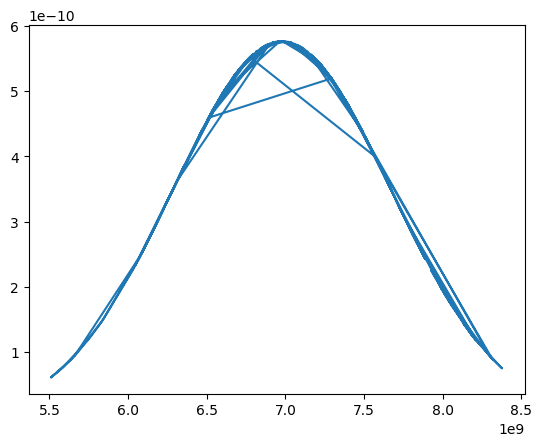

In [214]:
total_data = get_values_from_row(0)
uniswap_data = get_values_from_row(2)
makerDAO_data = get_values_from_row(3)
compound_data = get_values_from_row(4)

maker_mean = np.mean(makerDAO_data)
maker_std = np.std(makerDAO_data)

pdf = stats.norm.pdf(makerDAO_data, maker_mean, maker_std)

plt.plot(makerDAO_data, pdf)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2992dd6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x299270b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x29929f990>,
 'medians': [<matplotlib.lines.Line2D at 0x299405c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x2992b9350>,
 'means': [<matplotlib.lines.Line2D at 0x2991d9fd0>,
  <matplotlib.lines.Line2D at 0x2994b0590>]}

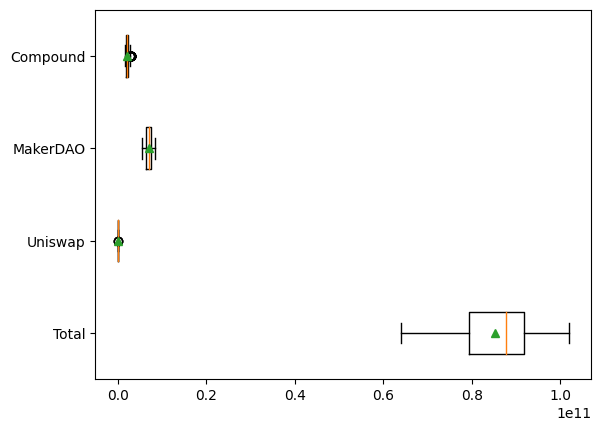

In [212]:
# box plot makerDAO data with outliers
plt.boxplot([total_data, uniswap_data, makerDAO_data, compound_data], showfliers=True, labels=['Total', 'Uniswap', 'MakerDAO', 'Compound'], vert=False, showmeans=True, autorange=True)

In [213]:
df.to_csv('../data/chain-dataset-All-Treated-.csv', index=False)
df.to_excel('../data/chain-dataset-All-Treated-Excel.xlsx', index=False)